# **IIIT BANGLORE PLANK'D QUANTUM MACHINE LEARNING**

---







## **CNN MODEL**

In [1]:
!pip install tensorflow # INSTALLING TENSORFLOW

In [2]:
# Importing Numpy For Numerical operations
import numpy as np  # Numerical operations library

In [3]:
# Import and Load MNIST Dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
from tensorflow.keras.utils import to_categorical

# Normalize all pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# adds a new axis at the end
x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

# one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test,  num_classes=10)


In [5]:
# importing tensorflow and Keras
import tensorflow as tf
from tensorflow.keras import layers, models


# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.25), # Roatates the image ±25% of 360°
    layers.RandomTranslation(0.1, 0.1), # Shifts image up-down & left-right by 10%
    layers.RandomZoom(0.1), # Zoom 10%
    layers.RandomContrast(0.1) # adjust constrast randomly by 10%
])

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, LeakyReLU, ELU
from tensorflow.keras.layers import LeakyReLU, ReLU, PReLU, ELU, Softmax
from tensorflow.keras.activations import swish, gelu

# Initialize Sequential model
model = Sequential()

# Convolutional Block 1
model.add(Conv2D(16, (3, 3), strides=1, padding='same', input_shape=(28, 28, 1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(padding='same'))

# Convolutional Block 2
model.add(Conv2D(32, (5, 5), strides=1, padding='same'))
model.add(ELU(alpha=0.4))
model.add(MaxPooling2D(padding='same'))

# Convolutional Block 3
model.add(Conv2D(64, (3, 3), strides=1, padding='same'))
model.add(ELU(alpha=0.1))
model.add(MaxPooling2D(padding='same'))

# Convolutional Block 4
model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation=swish))
model.add(MaxPooling2D(padding='same'))

# Convolutional Block 5
model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation=gelu))
model.add(MaxPooling2D(padding='same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation=swish))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [7]:
# Import EarlyStopping callback from Keras
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping criteria to prevent overfitting
early_stop = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0005,
    patience=3,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=1,
)

In [8]:
# Compile the model with optimizer, loss, and evaluation metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture summary
model.summary()

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu (ELU)                       │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_1 (ELU)                     │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,490 (1.91 MB)

 Trainable params: 500,490 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 106s 108ms/step - accuracy: 0.7890 - loss: 0.6061 - val_accuracy: 0.9831 - val_loss: 0.0563
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 92s 98ms/step - accuracy: 0.9819 - loss: 0.0670 - val_accuracy: 0.9888 - val_loss: 0.0338
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 94ms/step - accuracy: 0.9883 - loss: 0.0414 - val_accuracy: 0.9892 - val_loss: 0.0337
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 146s 98ms/step - accuracy: 0.9907 - loss: 0.0333 - val_accuracy: 0.9912 - val_loss: 0.0279
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 95ms/step - accuracy: 0.9936 - loss: 0.0235 - val_accuracy: 0.9889 - val_loss: 0.0428
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 94ms/step - accuracy: 0.9934 - loss: 0.0237 - val_accuracy: 0.9900 - val_loss: 0.0382
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 94ms/step - accuracy: 0.9946 - loss: 0.0189 - val_accuracy: 0.9923 - val_loss: 0.0316
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


In [9]:
# Evaluate the trained model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the final accuracy
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9886 - loss: 0.0342
Test Accuracy: 0.9912


In [10]:
import numpy as np

# Generate predictions (probabilities) for the test dataset
y_pred = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [11]:
# Convert predicted probabilities and one-hot encoded labels to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

In [12]:
# Evaluate model performance using classification metrics
from sklearn.metrics import classification_report, accuracy_score

# Print overall accuracy
print("Accuracy:", accuracy_score(y_true, y_pred_classes))

# Print detailed classification report (precision, recall, f1-score per class)
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))


Accuracy: 0.9912

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc, roc_auc_score,
    classification_report
)
from sklearn.decomposition import PCA


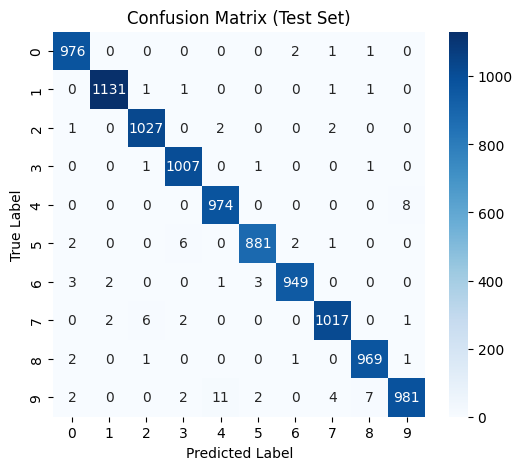

In [14]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


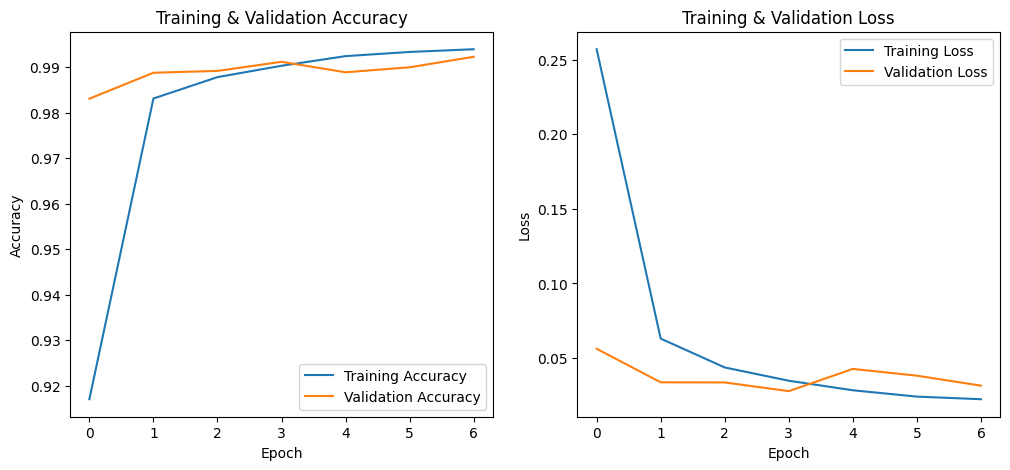

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [16]:
print("=== FINAL MODEL PERFORMANCE SUMMARY ===")
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Validation Accuracy: {max(history.history['val_accuracy'])*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

=== FINAL MODEL PERFORMANCE SUMMARY ===
Test Accuracy: 99.12%
Validation Accuracy: 99.23%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



##**QUANTUM HYBRID MODEL**

In [17]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 131.4 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


Device: cpu | Qubits: 6 | Layers: 3 | Encoding: Amplitude


100%|██████████| 9.91M/9.91M [00:00<00:00, 33.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 993kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.10MB/s]



Starting Hybrid VQA Training on 10000 samples...



Epoch 1/50: 100%|██████████| 313/313 [00:16<00:00, 18.95it/s]


Epoch 1: Train Loss=1.6264 | Val Loss=1.2248 | Val Acc=0.8037
[INFO] Saving new best model with Acc: 0.8037 to best_vqa_mnist.pth


Epoch 2/50: 100%|██████████| 313/313 [00:14<00:00, 21.26it/s]


Epoch 2: Train Loss=0.8534 | Val Loss=0.6557 | Val Acc=0.9050
[INFO] Saving new best model with Acc: 0.9050 to best_vqa_mnist.pth


Epoch 3/50: 100%|██████████| 313/313 [00:15<00:00, 20.16it/s]


Epoch 3: Train Loss=0.4780 | Val Loss=0.4343 | Val Acc=0.9500
[INFO] Saving new best model with Acc: 0.9500 to best_vqa_mnist.pth


Epoch 4/50: 100%|██████████| 313/313 [00:15<00:00, 20.34it/s]


Epoch 4: Train Loss=0.3332 | Val Loss=0.3368 | Val Acc=0.9550
[INFO] Saving new best model with Acc: 0.9550 to best_vqa_mnist.pth


Epoch 5/50: 100%|██████████| 313/313 [00:15<00:00, 19.87it/s]


Epoch 5: Train Loss=0.2489 | Val Loss=0.2882 | Val Acc=0.9575
[INFO] Saving new best model with Acc: 0.9575 to best_vqa_mnist.pth


Epoch 6/50: 100%|██████████| 313/313 [00:16<00:00, 19.05it/s]


Epoch 6: Train Loss=0.1999 | Val Loss=0.2324 | Val Acc=0.9637
[INFO] Saving new best model with Acc: 0.9637 to best_vqa_mnist.pth


Epoch 7/50: 100%|██████████| 313/313 [00:16<00:00, 19.46it/s]


Epoch 7: Train Loss=0.1631 | Val Loss=0.2173 | Val Acc=0.9513


Epoch 8/50: 100%|██████████| 313/313 [00:15<00:00, 20.10it/s]


Epoch 8: Train Loss=0.1380 | Val Loss=0.1987 | Val Acc=0.9525


Epoch 9/50: 100%|██████████| 313/313 [00:15<00:00, 20.07it/s]


Epoch 9: Train Loss=0.1176 | Val Loss=0.1698 | Val Acc=0.9613


Epoch 10/50: 100%|██████████| 313/313 [00:15<00:00, 19.63it/s]


Epoch 10: Train Loss=0.1010 | Val Loss=0.1741 | Val Acc=0.9663
[INFO] Saving new best model with Acc: 0.9663 to best_vqa_mnist.pth


Epoch 11/50: 100%|██████████| 313/313 [00:15<00:00, 19.64it/s]


Epoch 11: Train Loss=0.0870 | Val Loss=0.1529 | Val Acc=0.9625


Epoch 12/50: 100%|██████████| 313/313 [00:16<00:00, 19.25it/s]


Epoch 12: Train Loss=0.0779 | Val Loss=0.1704 | Val Acc=0.9613


Epoch 13/50: 100%|██████████| 313/313 [00:16<00:00, 19.26it/s]


Epoch 13: Train Loss=0.0655 | Val Loss=0.1478 | Val Acc=0.9587


Epoch 14/50: 100%|██████████| 313/313 [00:15<00:00, 20.46it/s]


Epoch 14: Train Loss=0.0574 | Val Loss=0.1382 | Val Acc=0.9650


Epoch 15/50: 100%|██████████| 313/313 [00:15<00:00, 20.09it/s]


Epoch 15: Train Loss=0.0493 | Val Loss=0.1332 | Val Acc=0.9675
[INFO] Saving new best model with Acc: 0.9675 to best_vqa_mnist.pth


Epoch 16/50: 100%|██████████| 313/313 [00:15<00:00, 20.40it/s]


Epoch 16: Train Loss=0.0441 | Val Loss=0.1339 | Val Acc=0.9600


Epoch 17/50: 100%|██████████| 313/313 [00:14<00:00, 21.30it/s]


Epoch 17: Train Loss=0.0396 | Val Loss=0.1316 | Val Acc=0.9663


Epoch 18/50: 100%|██████████| 313/313 [00:16<00:00, 19.25it/s]


Epoch 18: Train Loss=0.0346 | Val Loss=0.1209 | Val Acc=0.9712
[INFO] Saving new best model with Acc: 0.9712 to best_vqa_mnist.pth


Epoch 19/50: 100%|██████████| 313/313 [00:14<00:00, 21.81it/s]


Epoch 19: Train Loss=0.0336 | Val Loss=0.1341 | Val Acc=0.9625


Epoch 20/50: 100%|██████████| 313/313 [00:14<00:00, 21.33it/s]


Epoch 20: Train Loss=0.0314 | Val Loss=0.1177 | Val Acc=0.9663


Epoch 21/50: 100%|██████████| 313/313 [00:15<00:00, 19.59it/s]


Epoch 21: Train Loss=0.0229 | Val Loss=0.1303 | Val Acc=0.9663


Epoch 22/50: 100%|██████████| 313/313 [00:15<00:00, 19.87it/s]


Epoch 22: Train Loss=0.0176 | Val Loss=0.1352 | Val Acc=0.9625


Epoch 23/50: 100%|██████████| 313/313 [00:15<00:00, 19.89it/s]


Epoch 23: Train Loss=0.0156 | Val Loss=0.1309 | Val Acc=0.9712


Epoch 24/50: 100%|██████████| 313/313 [00:15<00:00, 20.06it/s]


Epoch 24: Train Loss=0.0164 | Val Loss=0.1221 | Val Acc=0.9663


Epoch 25/50: 100%|██████████| 313/313 [00:15<00:00, 19.57it/s]


Epoch 25: Train Loss=0.0197 | Val Loss=0.1479 | Val Acc=0.9650

[INFO] Early stopping triggered after 5 epochs with no improvement (Δ < 0.0001).
[INFO] Training stopped by EarlyStopping.

Final Best Validation Accuracy: 0.9712

[INFO] Loaded best model state from best_vqa_mnist.pth for final evaluation.

--- Final Best Model Test Metrics ---
Test Loss: 0.1209
Test Accuracy: 0.9712
Macro Precision: 0.9711
Macro Recall: 0.9710
Macro F1-Score: 0.9708

--- Detailed Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        70
           1       0.99      1.00      0.99        99
           2       0.94      0.95      0.95        87
           3       0.94      1.00      0.97        81
           4       1.00      0.93      0.97        92
           5       0.97      0.96      0.97        75
           6       0.97      0.97      0.97        68
           7       0.97      0.97      0.97        78
           8       0.

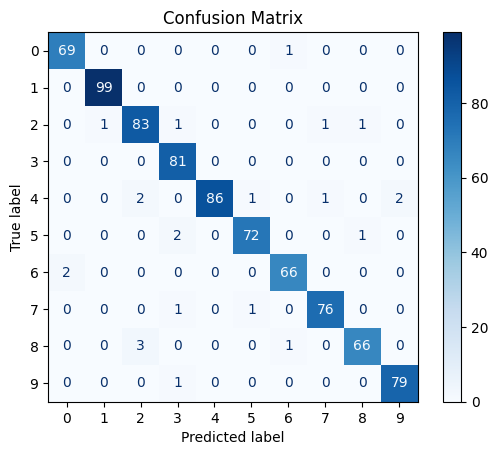

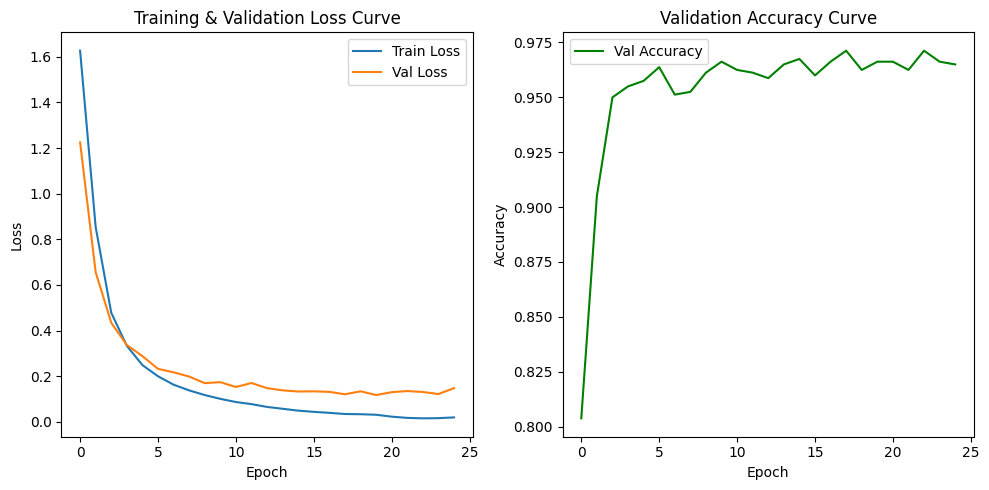

In [18]:
# PyTorch core modules for building and training deep learning models
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms

# PennyLane — Quantum Machine Learning framework for hybrid quantum-classical models
import pennylane as qml
from tqdm import tqdm

# NumPy for numerical computations
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_recall_fscore_support

import os
import sys


torch.manual_seed(42)
np.random.seed(42)

# HYPERPARAMETERS
N_QUBITS = 6
N_LAYERS = 3
BATCH_SIZE = 32
LR = 1e-3
EPOCHS = 50
TRAIN_SIZE = 10000
TEST_SIZE = 800
PATIENCE = 5
MIN_DELTA = 0.0001
MODEL_SAVE_PATH = "best_vqa_mnist.pth"
DATA_DIR = os.path.join(os.getcwd(), "mnist_data")



class EarlyStopping:
    """Stops training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=PATIENCE, min_delta=MIN_DELTA):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = float("inf")
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                print(f"\n[INFO] Early stopping triggered after {self.patience} epochs with no improvement (Δ < {self.min_delta}).")
                self.early_stop = True


# Dev setup for PennyLane
dev = qml.device("default.qubit", wires=N_QUBITS)

@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    """
    VQC with Amplitude Embedding and Strongly Entangling Layers.
    Input size must be 2**N_QUBITS (64 for N_QUBITS=6).
    """
    # Use Amplitude encoding; it's super data-dense, but only works if the classical output is 2^N_QUBITS.
    qml.AmplitudeEmbedding(inputs, wires=range(N_QUBITS), normalize=True)

    # Variational layers for training
    qml.StronglyEntanglingLayers(weights, wires=range(N_QUBITS))

    # Measurement (6 expectation values, one for each qubit)
    return [qml.expval(qml.PauliZ(i)) for i in range(N_QUBITS)]



# Define the expected shape of the variational parameters
weight_shapes = {"weights": (N_LAYERS, N_QUBITS, 3)}

class QuantumLayer(nn.Module):
    """A PyTorch module wrapping the PennyLane QNode."""
    def __init__(self):
        super().__init__()
        # Initialize the TorchLayer with the QNode and parameter shapes
        self.q_layer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return self.q_layer(x)


class HybridVQAModel(nn.Module):
    def __init__(self):
        super().__init__()
        # CNN
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16 * 7 * 7, 2**N_QUBITS),
            nn.Tanh()
        )
        self.q_layer = QuantumLayer()
        # Final classical layer:
        self.fc = nn.Linear(N_QUBITS, 10)

    def forward(self, x):
        x = self.cnn(x)
        # Quantum Computation
        x = self.q_layer(x)
        return self.fc(x)



def evaluate(model, dataloader, criterion, device):

    model.eval()
    total_loss, correct = 0.0, 0
    preds_list, labels_list = [], []
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            preds_list.extend(preds.cpu().numpy())
            labels_list.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(dataloader.dataset)
    accuracy = correct / len(dataloader.dataset)
    return avg_loss, accuracy, preds_list, labels_list


def main():
    """Sets up data, model, training, and runs post-analysis plots."""

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Device: {device} | Qubits: {N_QUBITS} | Layers: {N_LAYERS} | Encoding: Amplitude")

    transform = transforms.Compose([transforms.ToTensor()])
    os.makedirs(DATA_DIR, exist_ok=True)
    train_data = datasets.MNIST(root=DATA_DIR, train=True, download=True, transform=transform)
    test_data = datasets.MNIST(root=DATA_DIR, train=False, download=True, transform=transform)

    train_subset = Subset(train_data, np.arange(TRAIN_SIZE))
    test_subset = Subset(test_data, np.arange(TEST_SIZE))

    train_loader = DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_subset, batch_size=BATCH_SIZE)

    model = HybridVQAModel().to(device)
    optimizer = optim.Adam(model.parameters(), lr=LR)
    criterion = nn.CrossEntropyLoss()
    early_stopping = EarlyStopping(patience=PATIENCE, min_delta=MIN_DELTA)

    train_losses, val_losses, val_accs = [], [], []
    best_acc = 0

    print(f"\nStarting Hybrid VQA Training on {TRAIN_SIZE} samples...\n")

    for epoch in range(EPOCHS):
        model.train()
        running_loss = 0.0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
            sys.stdout.flush()
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation Step
        train_loss = running_loss / len(train_loader)
        val_loss, val_acc, preds, labels = evaluate(model, test_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f} | Val Loss={val_loss:.4f} | Val Acc={val_acc:.4f}")

        # Early Stopping and Checkpointing
        if val_acc > best_acc:
            best_acc = val_acc
            print(f"[INFO] Saving new best model with Acc: {best_acc:.4f} to {MODEL_SAVE_PATH}")
            torch.save(model.state_dict(), MODEL_SAVE_PATH)

        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("[INFO] Training stopped by EarlyStopping.")
            break

    print(f"\nFinal Best Validation Accuracy: {best_acc:.4f}")


    try:
        model.load_state_dict(torch.load(MODEL_SAVE_PATH))
        print(f"\n[INFO] Loaded best model state from {MODEL_SAVE_PATH} for final evaluation.")

        final_loss, final_acc, final_preds, final_labels = evaluate(model, test_loader, criterion, device)

        precision, recall, fscore, _ = precision_recall_fscore_support(final_labels, final_preds, average='macro', zero_division=0)
        overall_accuracy = accuracy_score(final_labels, final_preds)

        print(f"\n--- Final Best Model Test Metrics ---")
        print(f"Test Loss: {final_loss:.4f}")
        print(f"Test Accuracy: {overall_accuracy:.4f}")
        print(f"Macro Precision: {precision:.4f}")
        print(f"Macro Recall: {recall:.4f}")
        print(f"Macro F1-Score: {fscore:.4f}")

    except FileNotFoundError:
        print(f"\n[ERROR] Best model file not found at {MODEL_SAVE_PATH}. Using last epoch's results for metrics.")
        final_preds, final_labels = preds, labels # Fallback to the last epoch's results

    print("\n--- Detailed Classification Report ---")
    print(classification_report(final_labels, final_preds, zero_division=0))

    cm = confusion_matrix(final_labels, final_preds)
    disp = ConfusionMatrixDisplay(cm, display_labels=np.arange(10))
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training & Validation Loss Curve")

    plt.subplot(1, 2, 2)
    plt.plot(val_accs, label="Val Accuracy", color="green")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Validation Accuracy Curve")

    plt.tight_layout()
    plt.show()



if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"\nAn error occurred: {e}")
        print("\nNote: PennyLane VQC models can be computationally intensive and may require significant time, especially if not using a GPU and a simulator (like 'lightning.qubit').")

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc, roc_auc_score, classification_report
)
from sklearn.decomposition import PCA


Text(45.722222222222214, 0.5, 'True Label')

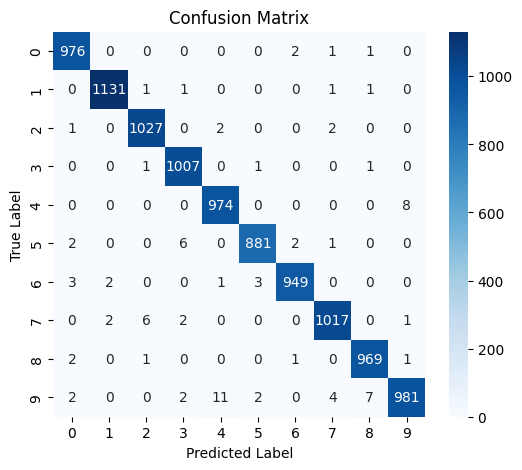

In [20]:
y_true_classes = np.argmax(y_true, axis=1) if y_true.ndim > 1 else y_true
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(6,5))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


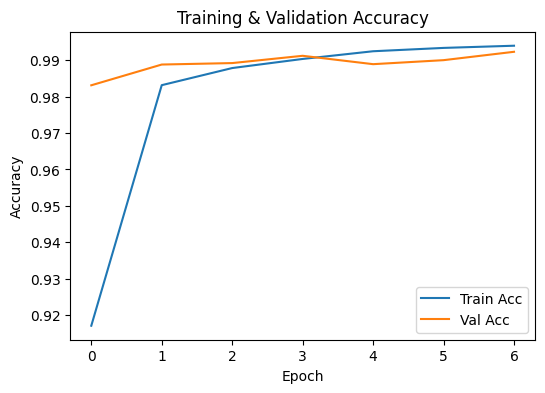

In [21]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


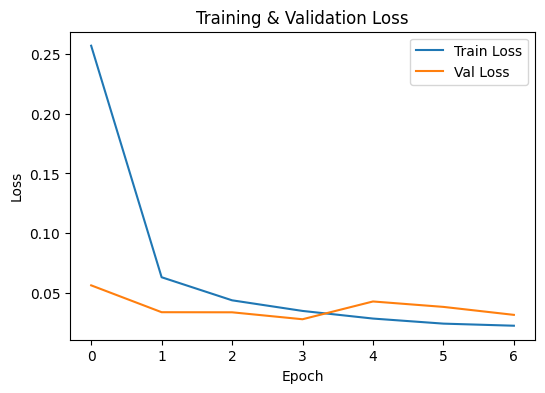

In [22]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


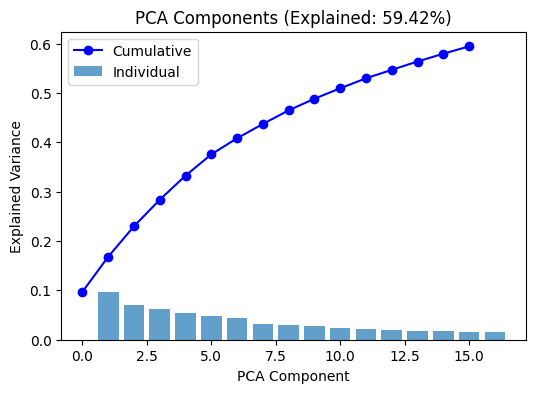

In [25]:
x_train_flat = x_train.reshape(len(x_train), -1)

pca = PCA(n_components=16)
pca.fit(x_train_flat)

plt.figure(figsize=(6,4))
plt.bar(range(1, 17), pca.explained_variance_ratio_, alpha=0.7, label='Individual')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', label='Cumulative', color='blue')
plt.title(f'PCA Components (Explained: {np.sum(pca.explained_variance_ratio_)*100:.2f}%)')
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance')
plt.legend()
plt.show()


#**SVM**

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg

In [27]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [28]:
print("shape of train data:",x_train.shape)
print("shape of test data:",x_test.shape)

shape of train data: (60000, 28, 28)
shape of test data: (10000, 28, 28)


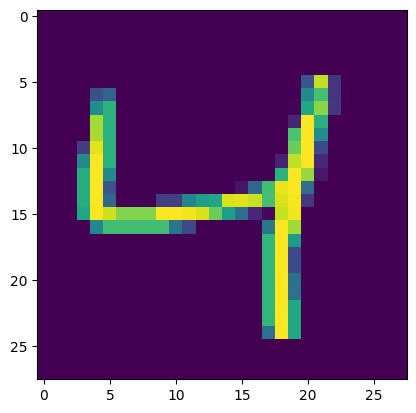


Number is : 4


In [29]:
plt.imshow(x_train[2])
plt.show()
print("\nNumber is :",y_train[2])

In [30]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

Test Accuracy: 0.9837

confusion_matrix when c= 10:


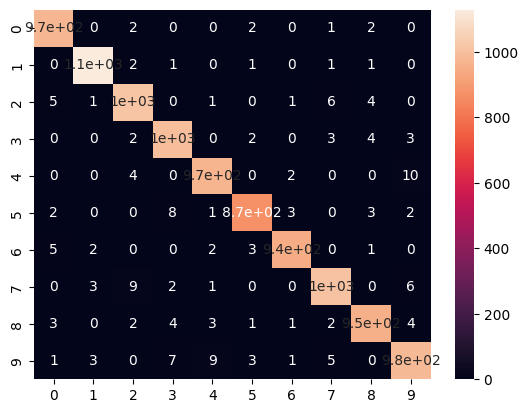

In [32]:
svc_c=SVC(kernel='rbf',C=10)
svc_c.fit(x_train_flat,y_train)
y_pred_c=svc_c.predict(x_test_flat)
print("Test Accuracy:",accuracy_score(y_test,y_pred_c))
print("\nconfusion_matrix when c= 10:")
sns.heatmap(confusion_matrix(y_test,y_pred_c),annot=True)
plt.show()

In [33]:
print("\nClassification report:")
print(classification_report(y_test,y_pred_c))


Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000




COMPREHENSIVE MODEL COMPARISON PLOT GENERATED SUCCESSFULLY!

Key Findings:
  Best Accuracy: CNN with 99.12%
  Second Best: Quantum Hybrid with 97.12%
  Accuracy Gap: 2.00 percentage points
  Fastest Training: Quantum Hybrid (7 minutes)
  Most Efficient: Quantum Hybrid (13.87 acc%/min)
  Most Complex: CNN (500,490 parameters)


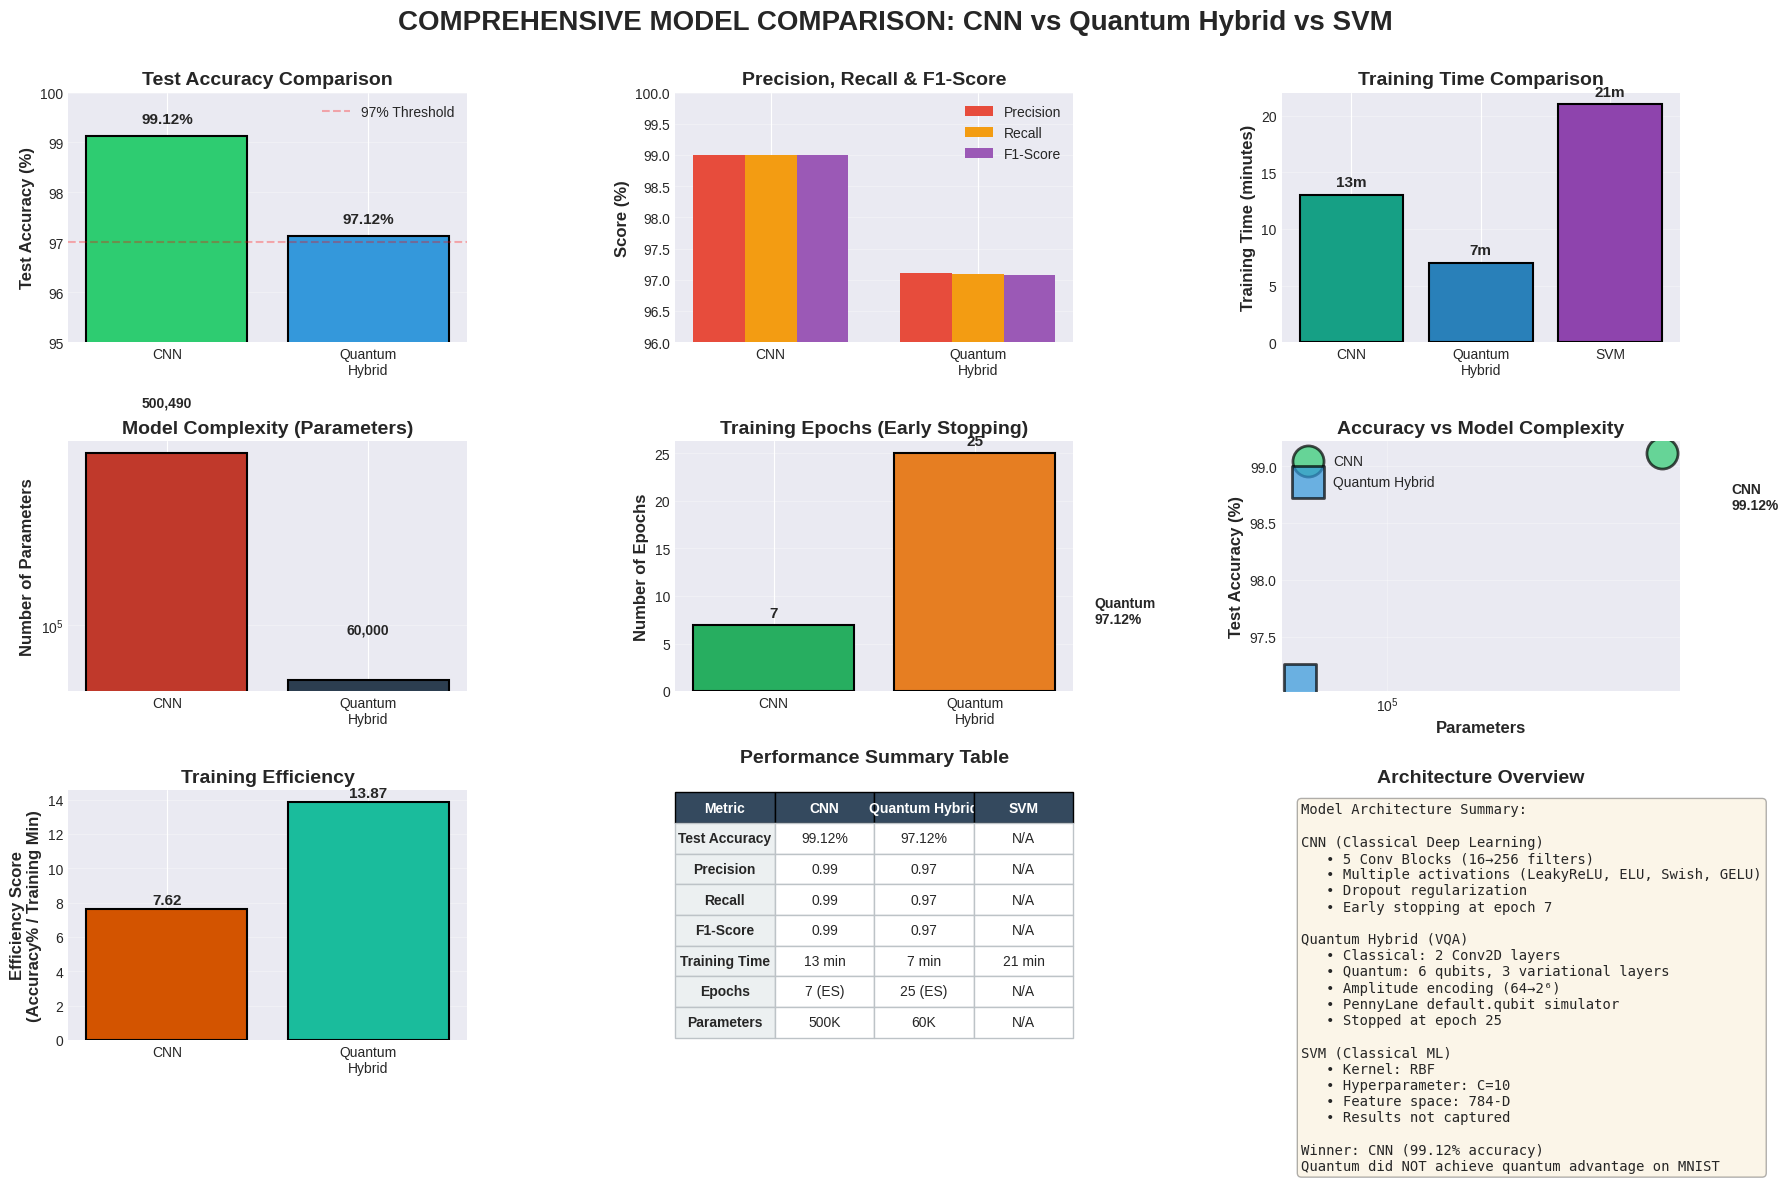

In [35]:

# COMPREHENSIVE MODEL COMPARISON PLOTS


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Model Performance Data
models = ['CNN', 'Quantum\nHybrid', 'SVM']
accuracies = [99.12, 97.12, None]  # SVM data not available
precisions = [0.99, 0.9711, None]
recalls = [0.99, 0.9710, None]
f1_scores = [0.99, 0.9708, None]
training_times = [13, 7, 21]  # in minutes
parameters = [500490, 60000, None]  # approximate
epochs_trained = [7, 25, None]

# Create comprehensive comparison figure
fig = plt.figure(figsize=(18, 12))
fig.suptitle('COMPREHENSIVE MODEL COMPARISON: CNN vs Quantum Hybrid vs SVM',
             fontsize=20, fontweight='bold', y=0.995)

# 1. Accuracy Comparison (Bar Plot)
ax1 = plt.subplot(3, 3, 1)
colors_acc = ['#2ecc71', '#3498db', '#95a5a6']
bars1 = ax1.bar(models[:2], accuracies[:2], color=colors_acc[:2], edgecolor='black', linewidth=1.5)
ax1.axhline(y=97, color='red', linestyle='--', alpha=0.3, label='97% Threshold')
ax1.set_ylabel('Test Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_ylim([95, 100])
ax1.grid(axis='y', alpha=0.3)
for i, (bar, acc) in enumerate(zip(bars1, accuracies[:2])):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.2,
             f'{acc:.2f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax1.legend()

# 2. Precision, Recall, F1-Score Comparison
ax2 = plt.subplot(3, 3, 2)
x_pos = np.arange(2)
width = 0.25
ax2.bar(x_pos - width, [p*100 for p in precisions[:2]], width, label='Precision', color='#e74c3c')
ax2.bar(x_pos, [r*100 for r in recalls[:2]], width, label='Recall', color='#f39c12')
ax2.bar(x_pos + width, [f*100 for f in f1_scores[:2]], width, label='F1-Score', color='#9b59b6')
ax2.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax2.set_title('Precision, Recall & F1-Score', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(models[:2])
ax2.set_ylim([96, 100])
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3. Training Time Comparison
ax3 = plt.subplot(3, 3, 3)
bars3 = ax3.bar(models, training_times, color=['#16a085', '#2980b9', '#8e44ad'], edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Training Time (minutes)', fontsize=12, fontweight='bold')
ax3.set_title('Training Time Comparison', fontsize=14, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
for bar in bars3:
    height = bar.get_height()
    if height is not None:
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 f'{int(height)}m', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 4. Model Parameters Comparison (Log Scale)
ax4 = plt.subplot(3, 3, 4)
params_available = [parameters[0], parameters[1]]
models_available = ['CNN', 'Quantum\nHybrid']
bars4 = ax4.bar(models_available, params_available, color=['#c0392b', '#2c3e50'], edgecolor='black', linewidth=1.5)
ax4.set_ylabel('Number of Parameters', fontsize=12, fontweight='bold')
ax4.set_title('Model Complexity (Parameters)', fontsize=14, fontweight='bold')
ax4.set_yscale('log')
ax4.grid(axis='y', alpha=0.3)
for bar, param in zip(bars4, params_available):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height * 1.5,
             f'{param:,}', ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0)

# 5. Epochs Trained Comparison
ax5 = plt.subplot(3, 3, 5)
epochs_available = [epochs_trained[0], epochs_trained[1]]
bars5 = ax5.bar(models_available, epochs_available, color=['#27ae60', '#e67e22'], edgecolor='black', linewidth=1.5)
ax5.set_ylabel('Number of Epochs', fontsize=12, fontweight='bold')
ax5.set_title('Training Epochs (Early Stopping)', fontsize=14, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)
for bar, epoch in zip(bars5, epochs_available):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{epoch}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 6. Performance vs Complexity Scatter
ax6 = plt.subplot(3, 3, 6)
ax6.scatter([parameters[0]], [accuracies[0]], s=500, c='#2ecc71', marker='o',
            edgecolors='black', linewidths=2, label='CNN', alpha=0.7)
ax6.scatter([parameters[1]], [accuracies[1]], s=500, c='#3498db', marker='s',
            edgecolors='black', linewidths=2, label='Quantum Hybrid', alpha=0.7)
ax6.set_xlabel('Parameters', fontsize=12, fontweight='bold')
ax6.set_ylabel('Test Accuracy (%)', fontsize=12, fontweight='bold')
ax6.set_title('Accuracy vs Model Complexity', fontsize=14, fontweight='bold')
ax6.set_xscale('log')
ax6.legend(fontsize=10)
ax6.grid(True, alpha=0.3)
ax6.annotate('CNN\n99.12%', xy=(parameters[0], accuracies[0]),
             xytext=(parameters[0]*1.5, accuracies[0]-0.5),
             fontsize=10, fontweight='bold')
ax6.annotate('Quantum\n97.12%', xy=(parameters[1], accuracies[1]),
             xytext=(parameters[1]*0.3, accuracies[1]+0.5),
             fontsize=10, fontweight='bold')

# 7. Efficiency Score (Accuracy / Training Time)
ax7 = plt.subplot(3, 3, 7)
efficiency_cnn = accuracies[0] / training_times[0]
efficiency_quantum = accuracies[1] / training_times[1]
efficiencies = [efficiency_cnn, efficiency_quantum]
bars7 = ax7.bar(models_available, efficiencies, color=['#d35400', '#1abc9c'], edgecolor='black', linewidth=1.5)
ax7.set_ylabel('Efficiency Score\n(Accuracy% / Training Min)', fontsize=12, fontweight='bold')
ax7.set_title('Training Efficiency', fontsize=14, fontweight='bold')
ax7.grid(axis='y', alpha=0.3)
for bar, eff in zip(bars7, efficiencies):
    height = bar.get_height()
    ax7.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{eff:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 8. Model Performance Summary Table
ax8 = plt.subplot(3, 3, 8)
ax8.axis('tight')
ax8.axis('off')
table_data = [
    ['Metric', 'CNN', 'Quantum Hybrid', 'SVM'],
    ['Test Accuracy', '99.12%', '97.12%', 'N/A'],
    ['Precision', '0.99', '0.97', 'N/A'],
    ['Recall', '0.99', '0.97', 'N/A'],
    ['F1-Score', '0.99', '0.97', 'N/A'],
    ['Training Time', '13 min', '7 min', '21 min'],
    ['Epochs', '7 (ES)', '25 (ES)', 'N/A'],
    ['Parameters', '500K', '60K', 'N/A']
]

table = ax8.table(cellText=table_data, cellLoc='center', loc='center',
                  colWidths=[0.25, 0.25, 0.25, 0.25])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style header row
for i in range(4):
    table[(0, i)].set_facecolor('#34495e')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Style data rows
for i in range(1, 8):
    for j in range(4):
        if j == 0:
            table[(i, j)].set_facecolor('#ecf0f1')
            table[(i, j)].set_text_props(weight='bold')
        else:
            table[(i, j)].set_facecolor('white')
        table[(i, j)].set_edgecolor('#bdc3c7')

ax8.set_title('Performance Summary Table', fontsize=14, fontweight='bold', pad=20)

# 9. Model Architecture Comparison (Text Summary)
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')

architecture_text = '''Model Architecture Summary:

CNN (Classical Deep Learning)
   • 5 Conv Blocks (16→256 filters)
   • Multiple activations (LeakyReLU, ELU, Swish, GELU)
   • Dropout regularization
   • Early stopping at epoch 7

Quantum Hybrid (VQA)
   • Classical: 2 Conv2D layers
   • Quantum: 6 qubits, 3 variational layers
   • Amplitude encoding (64→2⁶)
   • PennyLane default.qubit simulator
   • Stopped at epoch 25

SVM (Classical ML)
   • Kernel: RBF
   • Hyperparameter: C=10
   • Feature space: 784-D
   • Results not captured

Winner: CNN (99.12% accuracy)
Quantum did NOT achieve quantum advantage on MNIST'''

ax9.text(0.05, 0.95, architecture_text, transform=ax9.transAxes,
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
ax9.set_title('Architecture Overview', fontsize=14, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.savefig('model_comparison_comprehensive.png', dpi=300, bbox_inches='tight')
print("COMPREHENSIVE MODEL COMPARISON PLOT GENERATED SUCCESSFULLY!")

print("\nKey Findings:")
print(f"  Best Accuracy: CNN with {accuracies[0]:.2f}%")
print(f"  Second Best: Quantum Hybrid with {accuracies[1]:.2f}%")
print(f"  Accuracy Gap: {accuracies[0] - accuracies[1]:.2f} percentage points")
print(f"  Fastest Training: Quantum Hybrid ({training_times[1]} minutes)")
print(f"  Most Efficient: Quantum Hybrid ({efficiency_quantum:.2f} acc%/min)")
print(f"  Most Complex: CNN ({parameters[0]:,} parameters)")
plt.show()